In [22]:
%matplotlib inline

In [86]:
# IMPORTS
from util import *
from Chapter3 import OutlierDetection, ImputationMissingValues, DataTransformation, KalmanFilters
from util.VisualizeDataset import VisualizeDataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import warnings

In [2]:
# CONSTANTS
DATASETS_FOLDER_NAME = 'datasets'
DATASET_NAME = 'csv-participant-one'
DATASETS_FOLDER_PATH = os.path.join('..', DATASETS_FOLDER_NAME)
DATASET_PATH = os.path.join(DATASETS_FOLDER_PATH, DATASET_NAME)

In [89]:
# SETUP
warnings.filterwarnings('ignore')
outlier_detector = OutlierDetection.DistributionBasedOutlierDetection()
imputator = ImputationMissingValues.ImputationMissingValues()
data_transformer = DataTransformation.PrincipalComponentAnalysis()
kalman_filter = KalmanFilters.KalmanFilters()
visualizer = VisualizeDataset()

### Chapter 3 Ex 3

In [19]:
dataset = pd.read_csv(os.path.join(DATASET_PATH, 'heart_rate_smartwatch.csv'))

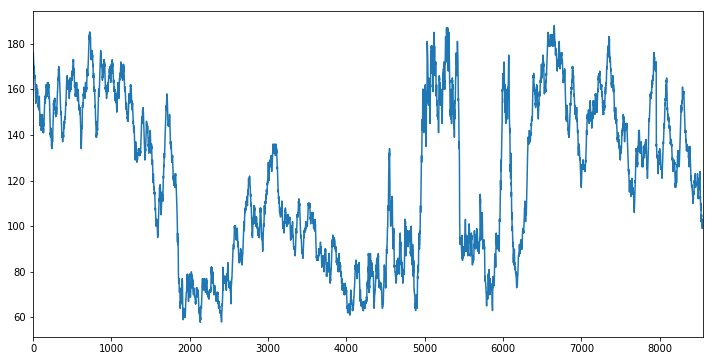

In [49]:
dataset.rate.plot(figsize=(12,6))

In [42]:
print("The amount of missing heart rates is: %d." % dataset.rate.isna().sum())

The amount of missing heart rates is: 0.


There is no missing data, let's look for outliers

In [48]:
dataset = kalman_filter.apply_kalman_filter(dataset, 'rate')

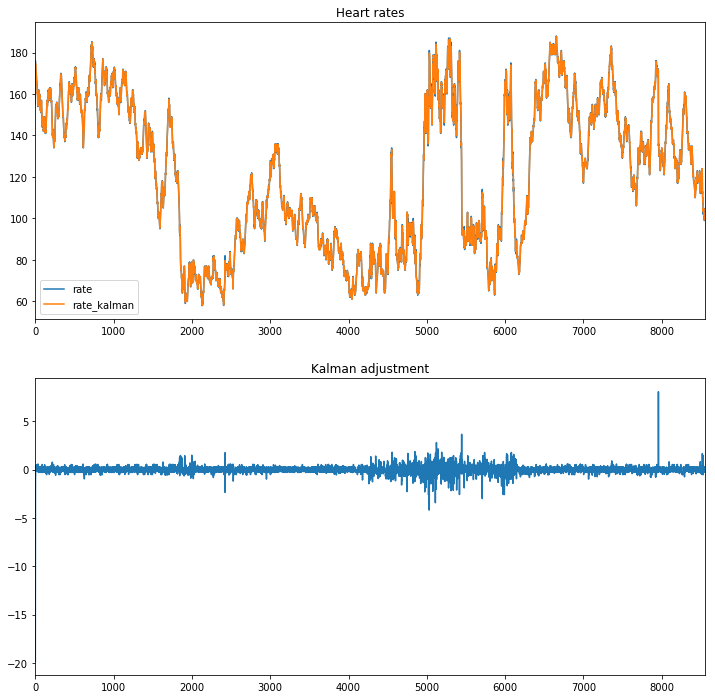

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,12))
dataset.plot(y=['rate', 'rate_kalman'], ax=ax1, title="Heart rates")
(dataset.rate_kalman-dataset.rate).plot(ax=ax2, title="Kalman adjustment")

#### Chapter 3 Ex 2

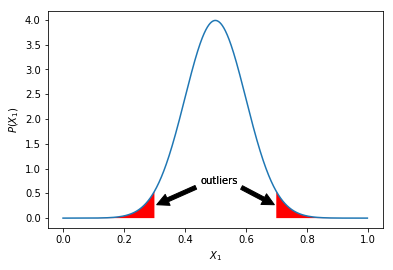

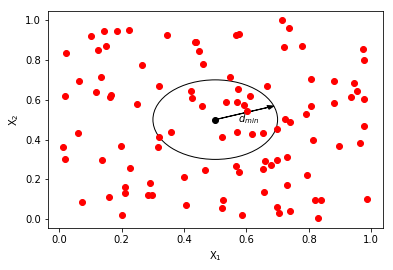

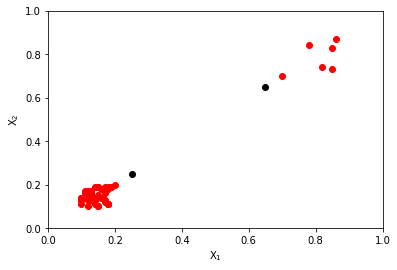

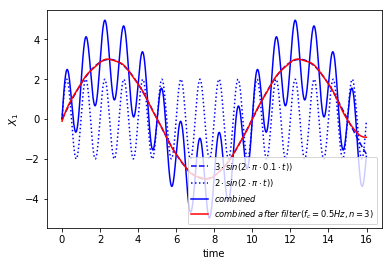

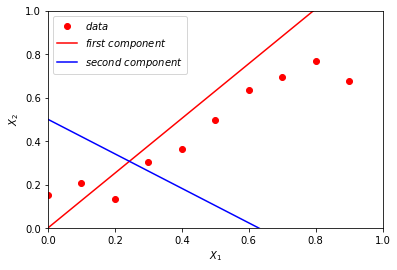

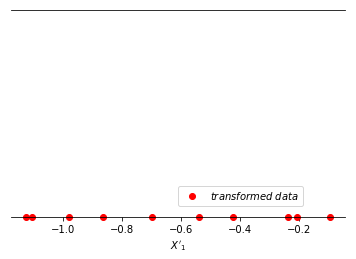

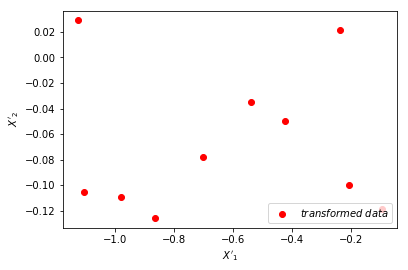

In [90]:
##############################################################
#                                                            #
#    Mark Hoogendoorn and Burkhardt Funk (2017)              #
#    Machine Learning for the Quantified Self                #
#    Springer                                                #
#    Chapter 3 - Exemplary graphs                            #
#                                                            #
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import math
from scipy.stats import norm
from Chapter3.DataTransformation import LowPassFilter
from sklearn.decomposition import PCA

np.random.seed(0)

# Figure 3.1

df = pd.DataFrame(np.arange(0, 1, 0.001), columns=list('X'))
mean = 0.5
sd = 0.1
p = pd.DataFrame(norm.pdf(df,mean,sd), columns=list('p'))
plot.hold(True)
plot.plot(df, p)
plot.xlabel('$X_{1}$')
plot.ylabel('$P(X_{1})$')
ax = plot.axes()
ax.fill_between(df['X'], 0, p['p'], where=df['X']<=0.3, facecolor='red')
ax.fill_between(df['X'], 0, p['p'], where=df['X']>=0.7, facecolor='red')
ax.annotate('outliers', xy=(0.3, 0.25), xytext=(0.45, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('outliers', xy=(0.7, 0.25), xytext=(0.45, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05))
plot.hold(False)
plot.show()

# Figure 3.2

df = pd.DataFrame(np.random.random_sample(size=(100, 2)), columns=list('XY'))
plot.plot(df['X'], df['Y'], 'ro')
plot.xlabel('X$_{1}$')
plot.ylabel('X$_{2}$')
plot.hold(True)
plot.plot([0.5], [0.5], 'ko')

# draw the circle with the arrow
# http://stackoverflow.com/questions/34823886/plotting-circle-diagram-with-rotary-arrow

radius = 0.2
angle = 20
angle_rad = angle * math.pi / 180  # degrees to radians
# Draw circle
circle = plot.Circle((0.5,0.5), radius, color='black', fill=False)
fig = plot.gcf()
fig.gca().add_artist(circle)

ax = plot.axes()
ax.arrow(0.5, 0.5,
         (radius - 0.02) * math.cos(angle_rad),
         (radius - 0.02) * math.sin(angle_rad),
         head_width=0.02, head_length=0.02, fc='k', ec='k')
ax.annotate('$d_{min}$', xy=(.6, .5),  xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='center')
plot.show()
plot.hold(False)

# Figure 3.3

np.random.seed(0)
df1 = pd.DataFrame(np.random.randint(10,20,size=(40, 2)), columns=list('XY'))
df2 = pd.DataFrame(np.random.randint(70,90,size=(5, 2)), columns=list('XY'))
df1 = df1 / float(100)
df2 = df2 / float(100)
plot.hold(True)
plot.plot(df1['X'], df1['Y'], 'ro')
plot.plot(0.7, 0.7, 'ro')
plot.plot(df2['X'], df2['Y'], 'ro')
plot.plot(0.2, 0.2, 'ro')
plot.xlabel('X$_{1}$')
plot.ylabel('X$_{2}$')
plot.xlim([0,1])
plot.ylim([0,1])
plot.plot([0.25], [0.25], 'ko')
plot.plot([0.65], [0.65], 'ko')
plot.show()

# Figure 3.4

# Sample frequency (Hz)
fs = 100

# Create time points....
t = pd.DataFrame(np.arange(0, 16, float(1)/fs), columns=list('X'))
c1 = 3 * np.sin(2 * math.pi * 0.1 * t)
c2 = 2 * np.sin(2 * math.pi * t)
plot.hold(True)
plot.plot(t, c1, 'b--')
plot.plot(t, c2, 'b:')
plot.plot(t, c1+c2, 'b-')
LowPass = LowPassFilter()
new_dataset = LowPass.low_pass_filter(c1+c2, 'X', fs, 0.5, order=3, phase_shift=True)
plot.plot(t, new_dataset['X_lowpass'], 'r-')
plot.legend(['$3 \cdot sin(2 \cdot \pi \cdot 0.1 \cdot t))$', '$2 \cdot sin(2 \cdot \pi \cdot t))$', '$combined$', '$combined$ $after$ $filter (f_{c}=0.5Hz, n=3)$'],
            loc=4, fontsize='small')
plot.xlabel('time')
plot.ylabel('$X_{1}$')
plot.show()

# Figure 3.5

df = pd.DataFrame(np.arange(0, 1, 0.1), columns=list('X'))
df['Y'] = pd.DataFrame(np.random.normal(0, 0.1, size=(10,1)), columns=list('Y'))
df['Y'] = df['Y'] + df['X']

pca = PCA(n_components=2, svd_solver='full')
pca.fit(df)
first_component = pca.components_[0]
second_component = pca.components_[1]

factor_1 = first_component[0]/first_component[1]
factor_2 = second_component[0]/second_component[1]

plot.hold(True)
plot.plot(df['X'], df['Y'], 'ro')
plot.plot(df['X'], df['X']*factor_1, 'r-')
plot.plot(df['X'], df['X']*factor_2+0.5, 'b-')
plot.legend(['$data$', '$first$ $component$', '$second$ $component$'], loc=2)
plot.xlim([0,1])
plot.ylim([0,1])
plot.xlabel('$X_{1}$')
plot.ylabel('$X_{2}$')
plot.hold(False)
plot.show()

# Figure 3.6

transformed_dataset = np.inner(first_component, df)
plot.hold(True)
plot.plot(transformed_dataset, [0]*transformed_dataset.shape[0], 'ro')
plot.ylim([-0.05,1])
plot.xlabel('$X\'_{1}$')
ax = plot.axes()
ax.get_yaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position('zero')
plot.legend(['$transformed$ $data$'], loc=(0.5, 0.1))
plot.hold(False)
plot.show()

# Figure 3.7

transformed_dataset = np.inner(pca.components_, df)
plot.hold(True)
plot.plot(transformed_dataset[0], transformed_dataset[1], 'ro')
plot.xlabel('$X\'_{1}$')
plot.ylabel('$X\'_{2}$')
plot.legend(['$transformed$ $data$'], loc=4)
plot.hold(False)
plot.show()